In [2]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.0 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [4]:
!pip install pandas numpy matplotlib seaborn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

train_df.head(), test_df.head()


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

In [6]:
print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("Train data info:")
train_df.info()

print("Test data info:")
test_df.info()


print("Train data missing values:")
print(train_df.isnull().sum())

print("Test data missing values:")
print(test_df.isnull().sum())


Train data shape: (891, 12)
Test data shape: (418, 11)
Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ----

In [8]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)


test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df.drop(columns=['Cabin'], inplace=True)


train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

train_df['Embarked'] = train_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


print("Train data after preprocessing:")
print(train_df.head())

print("Test data after preprocessing:")
print(test_df.head())


Train data after preprocessing:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  
Test data after pr

In [9]:
print("Train data description:")
print(train_df.describe(include='all'))

print("Test data description:")
print(test_df.describe(include='all'))


Train data description:
        PassengerId    Survived      Pclass                     Name  \
count    891.000000  891.000000  891.000000                      891   
unique          NaN         NaN         NaN                      891   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris   
freq            NaN         NaN         NaN                        1   
mean     446.000000    0.383838    2.308642                      NaN   
std      257.353842    0.486592    0.836071                      NaN   
min        1.000000    0.000000    1.000000                      NaN   
25%      223.500000    0.000000    2.000000                      NaN   
50%      446.000000    0.000000    3.000000                      NaN   
75%      668.500000    1.000000    3.000000                      NaN   
max      891.000000    1.000000    3.000000                      NaN   

               Sex         Age       SibSp       Parch  Ticket        Fare  \
count   891.000000  891.000000  8

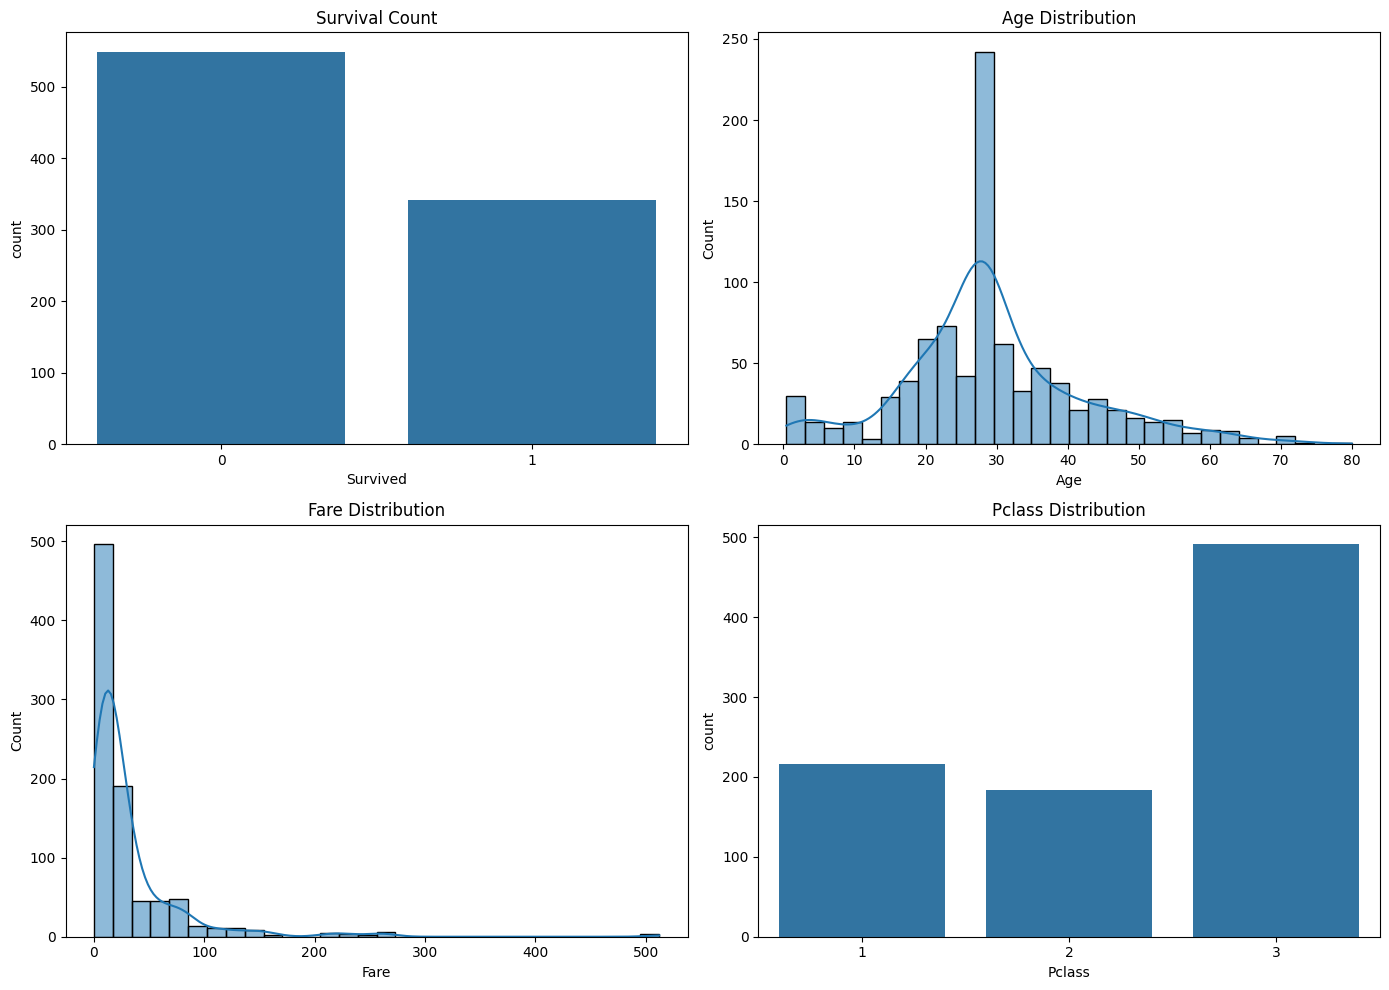

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))


sns.countplot(x='Survived', data=train_df, ax=ax[0, 0])
ax[0, 0].set_title('Survival Count')


sns.histplot(train_df['Age'], bins=30, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Age Distribution')


sns.histplot(train_df['Fare'], bins=30, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Fare Distribution')


sns.countplot(x='Pclass', data=train_df, ax=ax[1, 1])
ax[1, 1].set_title('Pclass Distribution')

plt.tight_layout()
plt.show()


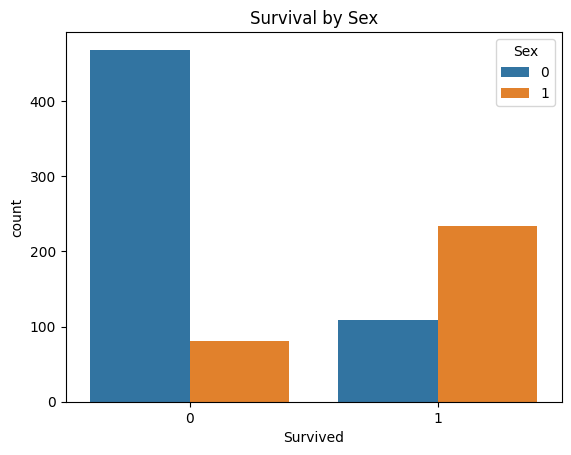

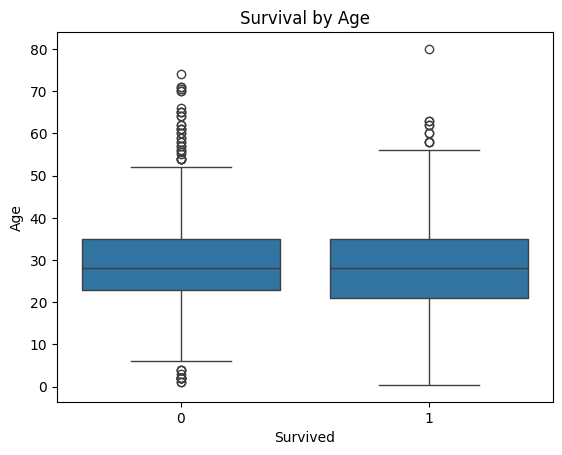

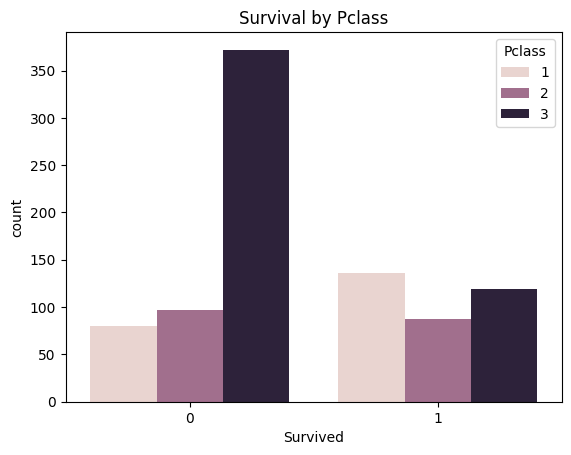

In [11]:
sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title('Survival by Sex')
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title('Survival by Age')
plt.show()


sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title('Survival by Pclass')
plt.show()


In [13]:
print(train_df.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object


In [14]:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns

print("Numeric columns:", numeric_cols)


Numeric columns: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')


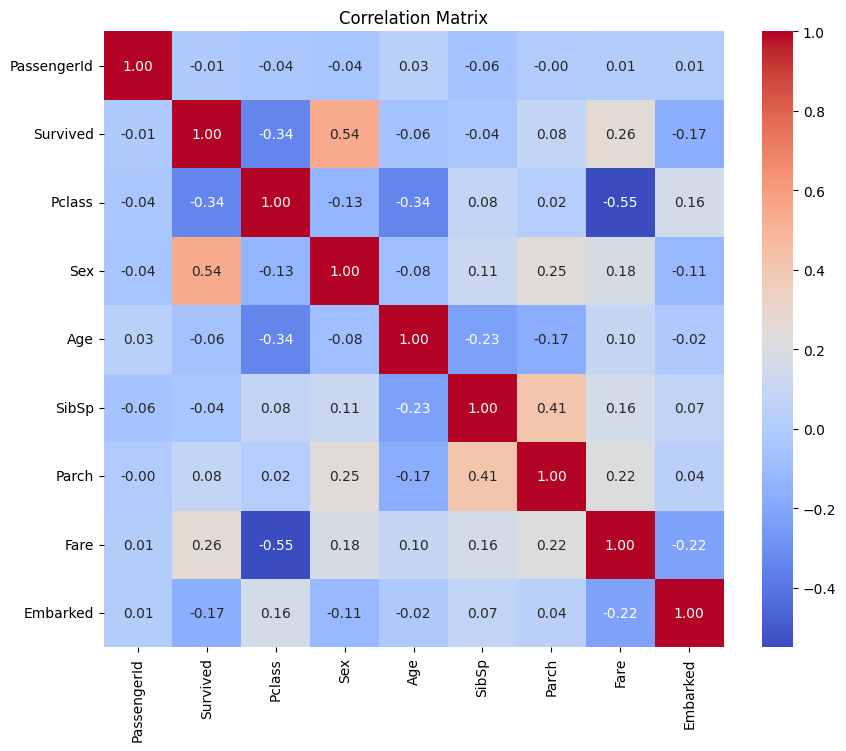

In [15]:
correlation_matrix = train_df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


<ipython-input-16-c32b2e994d3e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='pastel')


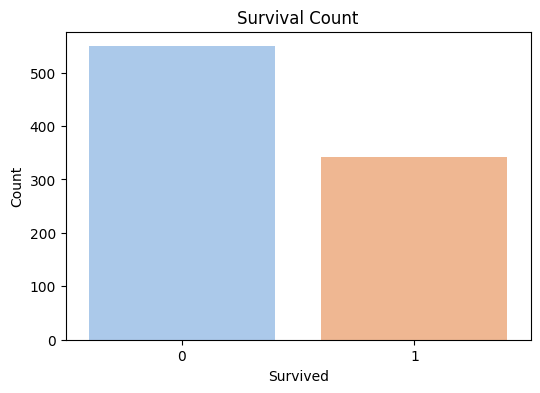

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df, palette='pastel')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()


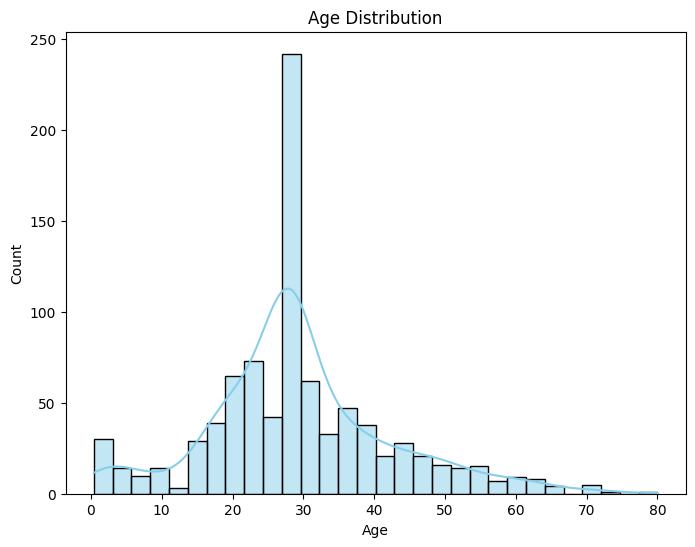

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


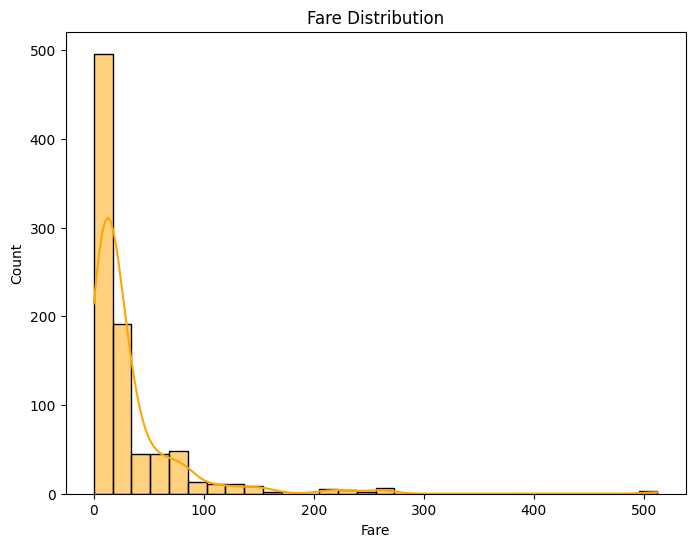

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(train_df['Fare'], bins=30, kde=True, color='orange')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


<ipython-input-19-3a366e54f6a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=train_df, palette='viridis')


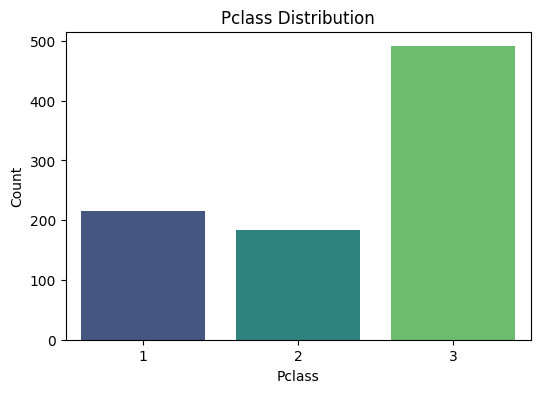

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=train_df, palette='viridis')
plt.title('Pclass Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


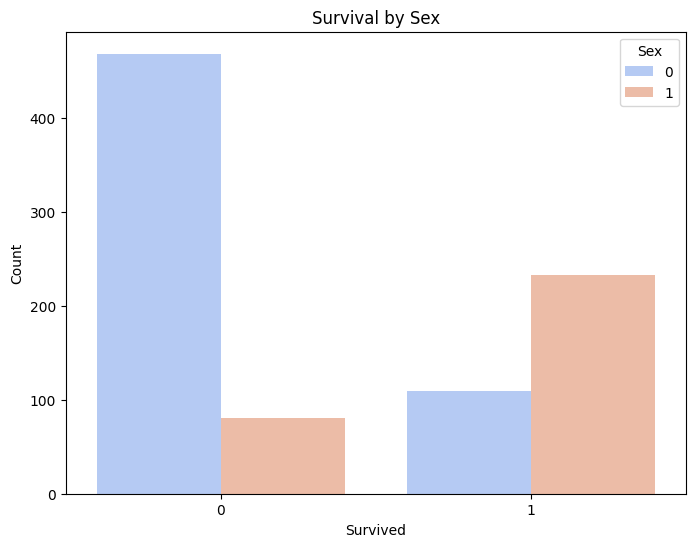

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=train_df, palette='coolwarm')
plt.title('Survival by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


<ipython-input-21-91486020fbfb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=train_df, palette='pastel')


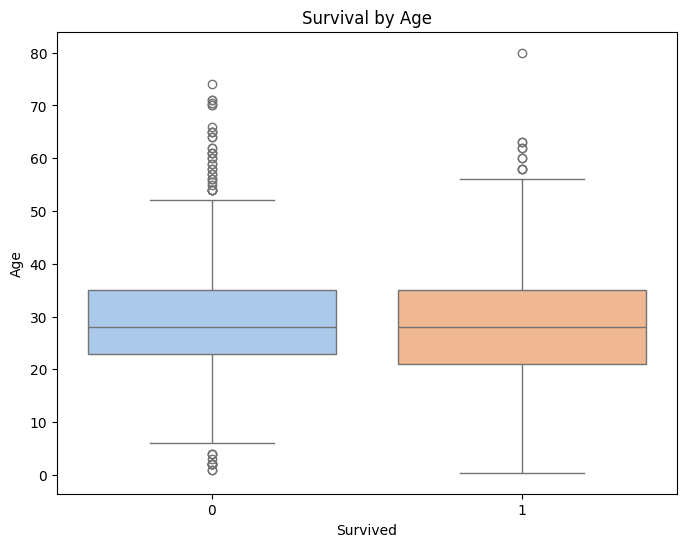

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=train_df, palette='pastel')
plt.title('Survival by Age')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()


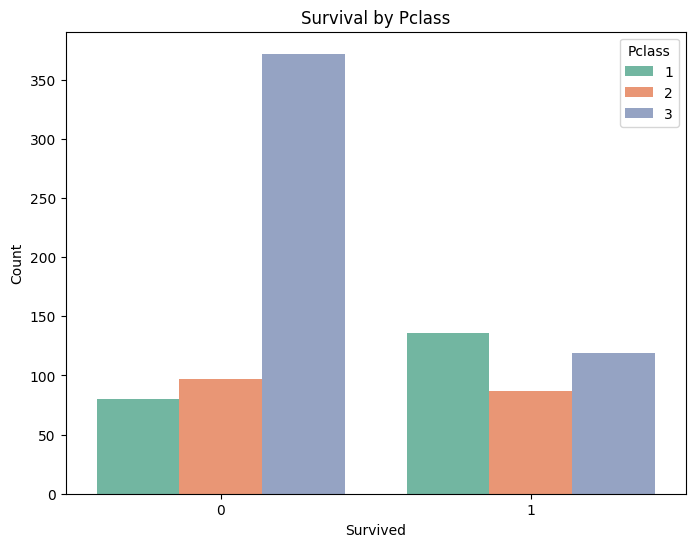

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette='Set2')
plt.title('Survival by Pclass')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()


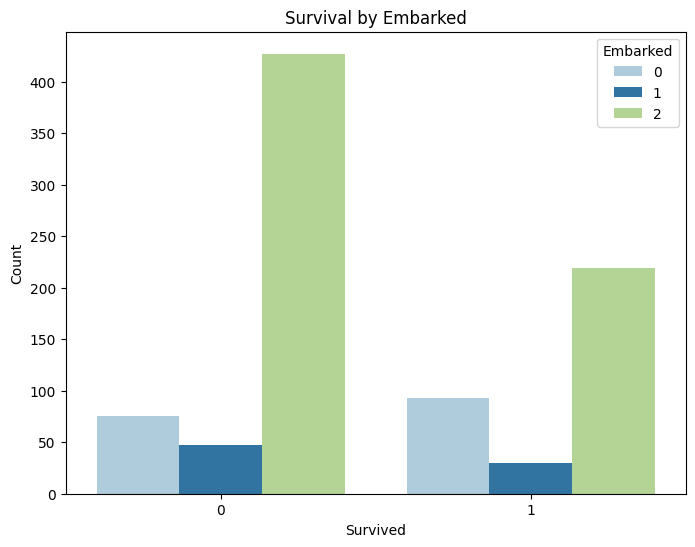

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Embarked', data=train_df, palette='Paired')
plt.title('Survival by Embarked')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Embarked')
plt.show()


In [24]:
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
test_df['Title'] = test_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())


train_df.drop(columns=['Name', 'Ticket'], inplace=True)
test_df.drop(columns=['Name', 'Ticket'], inplace=True)


print(train_df.head())
print(test_df.head())


   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  22.0      1      0   7.2500         2   
1            2         1       1    1  38.0      1      0  71.2833         0   
2            3         1       3    1  26.0      0      0   7.9250         2   
3            4         1       1    1  35.0      1      0  53.1000         2   
4            5         0       3    0  35.0      0      0   8.0500         2   

  Title  
0    Mr  
1   Mrs  
2  Miss  
3   Mrs  
4    Mr  
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked Title
0          892       3    0  34.5      0      0   7.8292         1    Mr
1          893       3    1  47.0      1      0   7.0000         2   Mrs
2          894       2    0  62.0      0      0   9.6875         1    Mr
3          895       3    0  27.0      0      0   8.6625         2    Mr
4          896       3    1  22.0      1      1  12.2875         2   Mrs


In [26]:
print("Unique titles in train data:", train_df['Title'].unique())

print("Unique titles in test data:", test_df['Title'].unique())


Unique titles in train data: [11 12  8  7  2 14  3 10 13  6  5 15  9  1  0 16  4]
Unique titles in test data: ['Mr' 'Mrs' 'Miss' 'Master' 'Ms' 'Col' 'Rev' 'Dr' 'Dona']


In [32]:
print("Unique titles in train data:", train_df['Title'].unique())


most_common_title = train_df['Title'].mode()[0]


test_df['Title'] = test_df['Title'].apply(lambda x: x if x in le_title.classes_ else most_common_title)


le_title = LabelEncoder()
train_df['Title'] = le_title.fit_transform(train_df['Title'])
test_df['Title'] = le_title.transform(test_df['Title'])


print("Train data after title encoding:")
print(train_df.head())
print("Test data after title encoding:")
print(test_df.head())


Unique titles in train data: [11 12  8  7  2 14  3 10 13  6  5 15  9  1  0 16  4]
Train data after title encoding:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  22.0      1      0   7.2500         2   
1            2         1       1    1  38.0      1      0  71.2833         0   
2            3         1       3    1  26.0      0      0   7.9250         2   
3            4         1       1    1  35.0      1      0  53.1000         2   
4            5         0       3    0  35.0      0      0   8.0500         2   

   Title  
0     11  
1     12  
2      8  
3     12  
4     11  
Test data after title encoding:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0          892       3    0  34.5      0      0   7.8292         1     11
1          893       3    1  47.0      1      0   7.0000         2     11
2          894       2    0  62.0      0      0   9.6875         1     11
3         

In [33]:
train_titles = train_df['Title'].unique()


test_df['Title'] = test_df['Title'].apply(lambda x: x if x in train_titles else 'Unknown')


train_df['Title'] = train_df['Title'].apply(lambda x: x if x in train_titles else 'Unknown')


le_title = LabelEncoder()
train_df['Title'] = le_title.fit_transform(train_df['Title'])
test_df['Title'] = le_title.transform(test_df['Title'])


print("Train data after title encoding:")
print(train_df.head())
print("Test data after title encoding:")
print(test_df.head())


Train data after title encoding:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  22.0      1      0   7.2500         2   
1            2         1       1    1  38.0      1      0  71.2833         0   
2            3         1       3    1  26.0      0      0   7.9250         2   
3            4         1       1    1  35.0      1      0  53.1000         2   
4            5         0       3    0  35.0      0      0   8.0500         2   

   Title  
0     11  
1     12  
2      8  
3     12  
4     11  
Test data after title encoding:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0          892       3    0  34.5      0      0   7.8292         1     11
1          893       3    1  47.0      1      0   7.0000         2     11
2          894       2    0  62.0      0      0   9.6875         1     11
3          895       3    0  27.0      0      0   8.6625         2     11
4          896    

In [34]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)


train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


from sklearn.preprocessing import LabelEncoder
le_embarked = LabelEncoder()
train_df['Embarked'] = le_embarked.fit_transform(train_df['Embarked'])
test_df['Embarked'] = le_embarked.transform(test_df['Embarked'])

print("Train data after missing value imputation:")
print(train_df.head())
print("Test data after missing value imputation:")
print(test_df.head())


Train data after missing value imputation:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3    0  22.0      1      0   7.2500         2   
1            2         1       1    1  38.0      1      0  71.2833         0   
2            3         1       3    1  26.0      0      0   7.9250         2   
3            4         1       1    1  35.0      1      0  53.1000         2   
4            5         0       3    0  35.0      0      0   8.0500         2   

   Title  
0     11  
1     12  
2      8  
3     12  
4     11  
Test data after missing value imputation:
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0          892       3    0  34.5      0      0   7.8292         1     11
1          893       3    1  47.0      1      0   7.0000         2     11
2          894       2    0  62.0      0      0   9.6875         1     11
3          895       3    0  27.0      0      0   8.6625         2     1

In [35]:

print("Missing values in train data after imputation:")
print(train_df.isnull().sum())

print("Missing values in test data after imputation:")
print(test_df.isnull().sum())


Missing values in train data after imputation:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64
Missing values in test data after imputation:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64


In [36]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})


print("Train data after encoding 'Sex':")
print(train_df.head())
print("Test data after encoding 'Sex':")
print(test_df.head())


Train data after encoding 'Sex':
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  \
0            1         0       3  NaN  22.0      1      0   7.2500         2   
1            2         1       1  NaN  38.0      1      0  71.2833         0   
2            3         1       3  NaN  26.0      0      0   7.9250         2   
3            4         1       1  NaN  35.0      1      0  53.1000         2   
4            5         0       3  NaN  35.0      0      0   8.0500         2   

   Title  
0     11  
1     12  
2      8  
3     12  
4     11  
Test data after encoding 'Sex':
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Title
0          892       3  NaN  34.5      0      0   7.8292         1     11
1          893       3  NaN  47.0      1      0   7.0000         2     11
2          894       2  NaN  62.0      0      0   9.6875         1     11
3          895       3  NaN  27.0      0      0   8.6625         2     11
4          896    

In [37]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()


train_df[features] = scaler.fit_transform(train_df[features])


test_df[features] = scaler.transform(test_df[features])

print("Train data after scaling:")
print(train_df.head())
print("Test data after scaling:")
print(test_df.head())


Train data after scaling:
   PassengerId  Survived  Pclass  Sex       Age     SibSp     Parch      Fare  \
0            1         0       3  NaN -0.565736  0.432793 -0.473674 -0.502445   
1            2         1       1  NaN  0.663861  0.432793 -0.473674  0.786845   
2            3         1       3  NaN -0.258337 -0.474545 -0.473674 -0.488854   
3            4         1       1  NaN  0.433312  0.432793 -0.473674  0.420730   
4            5         0       3  NaN  0.433312 -0.474545 -0.473674 -0.486337   

   Embarked  Title  
0         2     11  
1         0     12  
2         2      8  
3         2     12  
4         2     11  
Test data after scaling:
   PassengerId  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked  \
0          892       3  NaN  0.394887 -0.474545 -0.473674 -0.490783         1   
1          893       3  NaN  1.355510  0.432793 -0.473674 -0.507479         2   
2          894       2  NaN  2.508257 -0.474545 -0.473674 -0.453367         1   
3          8

In [40]:
print("Missing values in training data:")
print(X_train.isnull().sum())

print("Missing values in test data:")
print(test_df.isnull().sum())


Missing values in training data:
PassengerId      0
Pclass           0
Sex            712
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
dtype: int64
Missing values in test data:
PassengerId      0
Pclass           0
Sex            418
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Title            0
dtype: int64


In [42]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [45]:
print("Columns in train data:", train_df.columns)
print("Columns in test data:", test_df.columns)


Columns in train data: Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title'],
      dtype='object')
Columns in test data: Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title'],
      dtype='object')


In [47]:
sex_imputer = SimpleImputer(strategy='most_frequent')


train_df['Sex'] = sex_imputer.fit_transform(train_df[['Sex']])


test_df['Sex'] = sex_imputer.transform(test_df[['Sex']])

print("Missing values in training data after imputation:")
print(train_df.isnull().sum())

print("Missing values in test data after imputation:")
print(test_df.isnull().sum())


Missing values in training data after imputation:
PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64
Missing values in test data after imputation:
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64


In [48]:
from sklearn.model_selection import train_test_split


X = train_df.drop(columns=['Survived'])
y = train_df['Survived']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (712, 9)
Validation set size: (179, 9)


In [50]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
train_df[features] = scaler.fit_transform(train_df[features])
test_df[features] = scaler.transform(test_df[features])


In [51]:
from sklearn.model_selection import train_test_split

X = train_df.drop(columns=['Survived'])
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)


Training set size: (712, 9)
Validation set size: (179, 9)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
report = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 0.72
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       105
           1       0.76      0.47      0.58        74

    accuracy                           0.72       179
   macro avg       0.73      0.68      0.69       179
weighted avg       0.73      0.72      0.70       179



In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_val)

    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)

    # Store results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision (Class 0)': report['0']['precision'],
        'Recall (Class 0)': report['0']['recall'],
        'F1 Score (Class 0)': report['0']['f1-score'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1 Score (Class 1)': report['1']['f1-score']
    })

# Create DataFrame from results
results_df = pd.DataFrame(results)

# Display results
print(results_df)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training SVC...
Training Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision (Class 0)  Recall (Class 0)  \
0  Logistic Regression  0.720670             0.706767          0.895238   
1        Decision Tree  0.787709             0.807339          0.838095   
2        Random Forest  0.832402             0.857143          0.857143   
3                  SVC  0.586592             0.586592          1.000000   
4    Gradient Boosting  0.804469             0.807018          0.876190   

   F1 Score (Class 0)  Precision (Class 1)  Recall (Class 1)  \
0            0.789916             0.760870          0.472973   
1            0.822430             0.757143          0.716216   
2            0.857143             0.797297          0.797297   
3            0.739437             0.000000          0.000000   
4            0.840183             0.800000          0.702703   

   F1 Score (Class 1)  
0            0.583333  
1            0.736111  
2            0.797297  
3            0.000000  
4            0.748201  


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

# Retrieve the best model
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
179 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Best Accuracy Score: 0.8229587314094357


In [55]:
from sklearn.model_selection import RandomizedSearchCV

# Define a more focused parameter grid
param_distributions = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy Score:", random_search.best_score_)

# Retrieve the best model
best_rf = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}
Best Accuracy Score: 0.8229685807150595
